# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


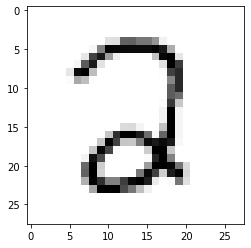

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23224819156593496
train accuracy is: 0.7173259889834752, test accuracy is 0.7308467741935484


Epoch 10 Loss 0.09520125386937163
train accuracy is: 0.9191286930395594, test accuracy is 0.9329637096774194


Epoch 20 Loss 0.058479892582185826
train accuracy is: 0.9389918210649307, test accuracy is 0.9475806451612904


Epoch 30 Loss 0.04593919765462161
train accuracy is: 0.9495075947254215, test accuracy is 0.9596774193548387


Epoch 40 Loss 0.03948496791656345
train accuracy is: 0.9547654815556669, test accuracy is 0.9672379032258065


Epoch 50 Loss 0.035514224645784284
train accuracy is: 0.9600233683859122, test accuracy is 0.9692540322580645


Epoch 60 Loss 0.03279795632049034
train accuracy is: 0.9622767484560174, test accuracy is 0.9702620967741935


Epoch 70 Loss 0.030776239090358728
train accuracy is: 0.9645301285261225, test accuracy is 0.9707661290322581


Epoch 80 Loss 0.02919041617790796
train accuracy is: 0.9667000500751126, test accuracy is 0.9707661290322581


Epoch 90 Loss 0.02789868663948059
train accuracy is: 0.9675346352862627, test accuracy is 0.9712701612903226


Epoch 100 Loss 0.02679301128859421
train accuracy is: 0.9689534301452178, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.025853326531694084
train accuracy is: 0.9697045568352529, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.025015195669612904
train accuracy is: 0.9705391420464029, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.024270310829160754
train accuracy is: 0.970956434651978, test accuracy is 0.9722782258064516


Epoch 140 Loss 0.02358537206473692
train accuracy is: 0.971540644299783, test accuracy is 0.9712701612903226


Epoch 150 Loss 0.022959956008972885
train accuracy is: 0.972291770989818, test accuracy is 0.9712701612903226


Epoch 160 Loss 0.02237400927140113
train accuracy is: 0.9733767317643132, test accuracy is 0.9712701612903226


Epoch 170 Loss 0.021827934524563067
train accuracy is: 0.9742947754965782, test accuracy is 0.9717741935483871


Epoch 180 Loss 0.021312555784166506
train accuracy is: 0.9751293607077283, test accuracy is 0.9722782258064516


Epoch 190 Loss 0.020824455398531262
train accuracy is: 0.9757135703555333, test accuracy is 0.9722782258064516


Epoch 200 Loss 0.020351605850033504
train accuracy is: 0.9764646970455684, test accuracy is 0.9742943548387096


Epoch 210 Loss 0.019911233886232702
train accuracy is: 0.9773827407778334, test accuracy is 0.9742943548387096


Epoch 220 Loss 0.0194805697757993
train accuracy is: 0.9781338674678685, test accuracy is 0.9753024193548387


Epoch 230 Loss 0.019074882869030817
train accuracy is: 0.9789684526790186, test accuracy is 0.9758064516129032


Epoch 240 Loss 0.01868020687327624
train accuracy is: 0.9795526623268236, test accuracy is 0.9758064516129032


0.004083256435356413

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2463006996387612
train accuracy is: 0.6659155399766317, test accuracy is 0.6789314516129032


Epoch 10 Loss 0.1038607298129882
train accuracy is: 0.9086129193790686, test accuracy is 0.9198588709677419


Epoch 20 Loss 0.07926808874466257
train accuracy is: 0.927891837756635, test accuracy is 0.9354838709677419


Epoch 30 Loss 0.0680412275069343
train accuracy is: 0.9359873143047905, test accuracy is 0.9445564516129032


Epoch 40 Loss 0.06135573729189822
train accuracy is: 0.9406609914872308, test accuracy is 0.9490927419354839


Epoch 50 Loss 0.05683290870302439
train accuracy is: 0.943832415289601, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.053530134835132324
train accuracy is: 0.9465030879652813, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.050988382278019995
train accuracy is: 0.9481722583875813, test accuracy is 0.9591733870967742


Epoch 80 Loss 0.04895990731540001
train accuracy is: 0.9496745117676515, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.04729010981723231
train accuracy is: 0.9507594725421465, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.04588650358899164
train accuracy is: 0.9522617259222167, test accuracy is 0.9606854838709677


Epoch 110 Loss 0.0446855003653646
train accuracy is: 0.9531797696544817, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04364099835645742
train accuracy is: 0.9542647304289767, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.04272205059462213
train accuracy is: 0.9550993156401268, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04190623530231742
train accuracy is: 0.956434651977967, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.041173792580567685
train accuracy is: 0.957018861625772, test accuracy is 0.9627016129032258


Epoch 160 Loss 0.04051113983991515
train accuracy is: 0.957603071273577, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.03990896869250079
train accuracy is: 0.9582707394424971, test accuracy is 0.9642137096774194


Epoch 180 Loss 0.03935694933987467
train accuracy is: 0.958604573526957, test accuracy is 0.9642137096774194


Epoch 190 Loss 0.03884978396461555
train accuracy is: 0.9588549490903021, test accuracy is 0.9642137096774194


Epoch 200 Loss 0.03838057368040196
train accuracy is: 0.9595226172592222, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.03794498266580286
train accuracy is: 0.9595226172592222, test accuracy is 0.9652217741935484


Epoch 220 Loss 0.0375390563321535
train accuracy is: 0.9599399098647972, test accuracy is 0.9652217741935484


Epoch 230 Loss 0.03716012713911416
train accuracy is: 0.9601902854281422, test accuracy is 0.9652217741935484


Epoch 240 Loss 0.03680336026080332
train accuracy is: 0.9605241195126022, test accuracy is 0.9657258064516129


0.02441312835274343

### Comparing results of NN and LR

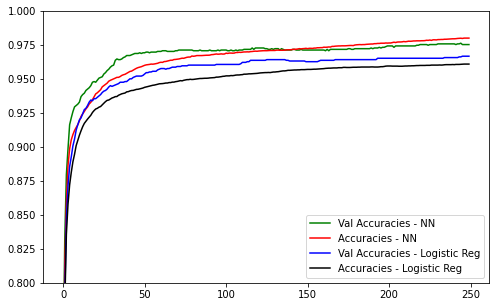

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

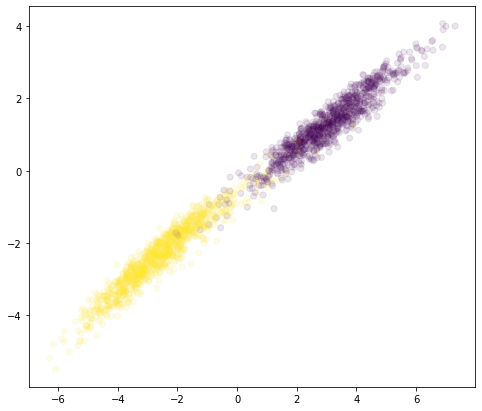

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

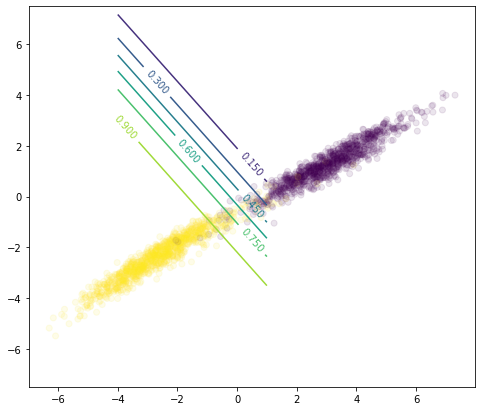

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );